In [1]:
import numpy as np
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import matplotlib.lines as mlines
import matplotlib.ticker as mtick
from matplotlib import gridspec
import sys
sys.path.append(os.path.join(Path(os.getcwd()).parents[0], "functions"))
import warnings
warnings.filterwarnings('ignore')
import helper_functions as hfn

In [2]:
from lmfit import Model
from lmfit.models import LinearModel

In [3]:
mod_lm = LinearModel(prefix = 'lin')

In [4]:
colors = ["blue", "dark cyan", "aquamarine", "lime"]#["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.set_palette = sns.xkcd_palette(colors)
sns.set_style("ticks")
hfont = {'fontname':'Myriad Pro'}

# get path

In [5]:
path = Path(os.getcwd()).parents[0]

pathdata = os.path.join(path, 'compare_linfit_params')


In [6]:
figpath = os.path.join(path, 'figures')
hfn.dir_check(figpath)
    
fig2path = os.path.join(figpath, 'Fig2')
hfn.dir_check(fig2path)
    
fig2panelspath = os.path.join(fig2path, 'panels')
hfn.dir_check(fig2panelspath)

In [7]:
modelpath = os.path.join(path, 'data/network_models/probabilistic_model')
respath = os.path.join(modelpath, 'grid_simulations')

# Load data

In [8]:
list_pooled_wLGd =['VIS', 'RSP', 'Thal', 'Dist_ctx']
list_pooled_noLGd = ['VIS', 'RSP', 'Thal_noLGd', 'Dist_ctx']

list_Thal = ['AM', 'LD', 'LP', 'LGd']
list_Thal_noLGd = ['AM', 'LD', 'LP']
list_VIS = ['VISp', 'VISpm', 'VISl', 'VISam', 'VISal']
list_Dist_ctx = ['ORB', 'ACA', 'MOs', 'CLA', 'PTLp', 'TEa', 'AUD']
list_RSP = ['RSPagl', 'RSPd', 'RSPv']


In [9]:
int_all_log = pd.read_csv(os.path.join(pathdata,'df_CI95_int_all_targets.csv'))
slope_all_log = pd.read_csv(os.path.join(pathdata,'df_CI95_slope_all_targets.csv'))

int_LGd_all_lin = pd.read_csv(os.path.join(pathdata,'df_CI95_int_all_targets_lin.csv'))
slope_LGd_all_lin = pd.read_csv(os.path.join(pathdata,'df_CI95_slope_all_targets_lin.csv'))

In [10]:
int_all_log = int_all_log.drop(int_all_log.columns[[0]], axis=1) 
slope_all_log = slope_all_log.drop(slope_all_log.columns[[0]], axis=1) 

In [11]:
int_LGd_all_lin = int_LGd_all_lin.drop(int_LGd_all_lin.columns[[0]], axis=1) 
slope_LGd_all_lin = slope_LGd_all_lin.drop(slope_LGd_all_lin.columns[[0]], axis=1) 

In [12]:
int_log_wLGd = int_all_log[int_all_log['area'].isin(list_pooled_wLGd)].reset_index(drop = True)
int_log_noLGd = int_all_log[int_all_log['area'].isin(list_pooled_noLGd)].reset_index(drop = True)

slope_log_noLGd = slope_all_log[slope_all_log['area'].isin(list_pooled_noLGd)].reset_index(drop = True)
slope_log_wLGd = slope_all_log[slope_all_log['area'].isin(list_pooled_wLGd)].reset_index(drop = True)

In [13]:
int_log_wLGd = int_log_wLGd.set_index('area')
int_log_noLGd = int_log_noLGd.set_index('area')
int_LGd_all_lin = int_LGd_all_lin.set_index('area')
slope_log_wLGd = slope_log_wLGd.set_index('area')
slope_log_noLGd = slope_log_noLGd.set_index('area')
slope_LGd_all_lin = slope_LGd_all_lin.set_index('area')

# add column with corresponding pooled area

In [14]:
#list_selec = ['all_VIS', 'VIS', 'RSP', 'Thal', 'Thal_noLGd', 'Dist_ctx']
list_selec = ['VIS', 'RSP', 'Thal', 'Thal_noLGd', 'Dist_ctx']

In [15]:
int_all_log_selec = int_all_log[~int_all_log['area'].isin(list_selec)].reset_index(drop = True)

In [16]:
int_all_log_selec['func area'] = 0

int_all_log_selec.loc[int_all_log_selec['area'].isin(list_VIS), 'func area'] = 'VIS'
int_all_log_selec.loc[int_all_log_selec['area'].isin(list_RSP), 'func area'] = 'RSP'
int_all_log_selec.loc[int_all_log_selec['area'].isin(list_Thal), 'func area'] = 'Thal'
int_all_log_selec.loc[int_all_log_selec['area'].isin(list_Dist_ctx), 'func area'] = 'Dist_ctx'

In [17]:
slope_all_log_selec = slope_all_log[~slope_all_log['area'].isin(list_selec)].reset_index(drop = True)

In [18]:
slope_all_log_selec['func area'] = 0

slope_all_log_selec.loc[slope_all_log_selec['area'].isin(list_VIS), 'func area'] = 'VIS'
slope_all_log_selec.loc[slope_all_log_selec['area'].isin(list_RSP), 'func area'] = 'RSP'
slope_all_log_selec.loc[slope_all_log_selec['area'].isin(list_Thal), 'func area'] = 'Thal'
slope_all_log_selec.loc[slope_all_log_selec['area'].isin(list_Dist_ctx), 'func area'] = 'Dist_ctx'

In [19]:
slope_all_log_selec["func area"].replace({0: "whole brain"}, inplace=True)

In [20]:
int_all_log_selec["func area"].replace({0: "whole brain"}, inplace=True)

In [21]:
int_all_log_selec_noLGd = int_all_log_selec[int_all_log_selec['area']!= 'LGd']

In [22]:
slope_all_log_selec_noLGd = slope_all_log_selec[slope_all_log_selec['area']!= 'LGd']

# fit all sub-areas intercept vs slope

In [23]:
x = int_all_log_selec['mean int'][~int_all_log_selec['area'].isin(['pre total' , 'input'])]

In [24]:
y = slope_all_log_selec['mean slope'][~slope_all_log_selec['area'].isin(['pre total' , 'input'])]

In [25]:
slope_all_log_selec[~slope_all_log_selec['area'].isin(['pre total' , 'input'])]

,area,mean slope,median slope,95%quant-low,95%quant-high,func area
0,PTLp,0.659624,0.657520,0.515451,0.814693,Dist_ctx
1,TEa,0.802694,0.803311,0.666378,0.937834,Dist_ctx
2,AUD,0.728431,0.727865,0.600696,0.865042,Dist_ctx
3,VISp,0.450080,0.448601,0.343478,0.560838,VIS
4,VISpm,0.424051,0.421804,0.273559,0.576639,VIS
5,VISl,0.584671,0.583778,0.451334,0.726478,VIS
6,VISam,0.534007,0.531425,0.371964,0.706411,VIS
7,VISal,0.511374,0.510767,0.399596,0.625642,VIS
8,RSPagl,0.529219,0.529216,0.391395,0.665047,RSP
9,RSPd,0.516903,0.516214,0.392040,0.642903,RSP


In [26]:
pars_lm = mod_lm.guess(y, x = x)
result_lm = mod_lm.fit(y, pars_lm, x = x)

In [27]:
(intercept, slope) = result_lm.params['linintercept'].value, result_lm.params['linslope'].value

In [28]:
print(result_lm.fit_report())

[[Model]]
    Model(linear, prefix='lin')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 19
    # variables        = 2
    chi-square         = 0.10421177
    reduced chi-square = 0.00613010
    Akaike info crit   = -94.9096142
    Bayesian info crit = -93.0207363
    R-squared          = 0.68909862
[[Variables]]
    linslope:     -0.21888242 +/- 0.03565801 (16.29%) (init = -0.2188824)
    linintercept:  0.91265764 +/- 0.05887683 (6.45%) (init = 0.9126576)
[[Correlations]] (unreported correlations are < 0.100)
    C(linslope, linintercept) = -0.952


In [29]:
sd_int = result_lm.params['linintercept'].stderr

In [30]:
sd_slope = result_lm.params['linslope'].stderr

# Load data from model

In [31]:
all_params = pd.read_hdf(os.path.join(respath, 'allparams.h5'))

thisres_params = pd.read_hdf(os.path.join(respath, 'thisres_params.h5'))

# panel A

In [32]:
colors = ["cobalt blue", "dark cyan", "aquamarine", "dark lime", "dark grey"]
sns.set_palette = sns.xkcd_palette(colors)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


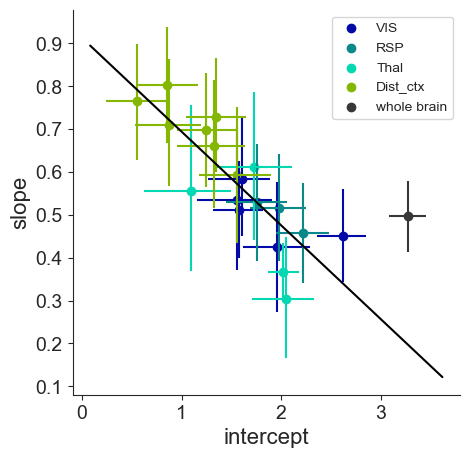

In [38]:
f2b_v1 = plt.figure(figsize= (5,5))

ax = f2b_v1.add_subplot(111)
ax.tick_params(labelsize=12)

for i, area in enumerate(list(int_log_wLGd.index)+['whole brain']):

    plt.scatter(int_all_log_selec['mean int'][int_all_log_selec['func area'] == area], slope_all_log_selec['mean slope'][slope_all_log_selec['func area'] == area], color = sns.xkcd_palette(colors)[i], label = area)
    thisxerr = [int_all_log_selec['mean int'][int_all_log_selec['func area'] == area].values - int_all_log_selec['95%quant-low'][int_all_log_selec['func area'] == area].values, int_all_log_selec['95%quant-high'][int_all_log_selec['func area'] == area].values - int_all_log_selec['mean int'][int_all_log_selec['func area'] == area].values]
    thisyerr = [slope_all_log_selec['mean slope'][slope_all_log_selec['func area'] == area].values - slope_all_log_selec['95%quant-low'][slope_all_log_selec['func area'] == area].values, slope_all_log_selec['95%quant-high'][slope_all_log_selec['func area'] == area].values - slope_all_log_selec['mean slope'][slope_all_log_selec['func area'] == area].values]
    plt.errorbar(int_all_log_selec['mean int'][int_all_log_selec['func area'] == area], slope_all_log_selec['mean slope'][slope_all_log_selec['func area'] == area], xerr = thisxerr, yerr = thisyerr, color = sns.xkcd_palette(colors)[i], fmt='none')

plt.legend()

# plot fit

thisx = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], num = 100)
plt.plot(thisx, intercept+thisx*slope, 'k')

plt.xlabel('intercept',fontsize = 16)
plt.ylabel('slope',fontsize = 16)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
    
plt.savefig(os.path.join(fig2panelspath, 'fig2a.png'),  bbox_inches='tight')
plt.savefig(os.path.join(fig2panelspath, 'fig2a.eps'),  bbox_inches='tight', format = 'eps')

# Panel B: model

In [34]:
colorsni = ["indigo", "purple", "red", "orange"]

markersp = ['o', 's', 'v', '^', '<', '>']

In [35]:
thisres_params.p.unique()

array([5.e-05, 1.e-04, 5.e-04, 1.e-03, 5.e-03, 1.e-02])

In [36]:
thisres_params = thisres_params[thisres_params.Ni != 1000]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


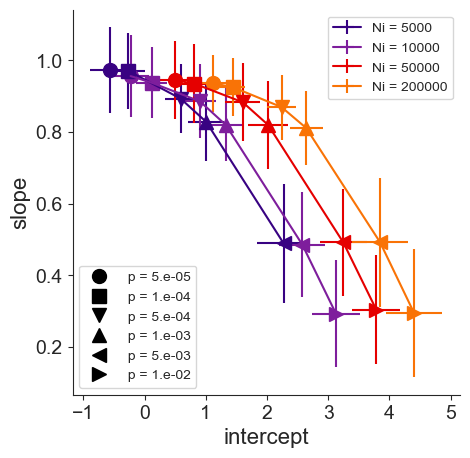

In [37]:
f2c = plt.figure(figsize= (5,5))

ax = f2c.add_subplot(111)
ax.tick_params(labelsize=12)
eb = {}
m={}
for i,ni in enumerate(thisres_params.Ni.unique()):
    if ni != 1000:
        thisres =  thisres_params[thisres_params.Ni == ni]
    #     plt.plot(thisres['intercept']['mean'], thisres['slope']['mean'])
        eb[i] = plt.errorbar(thisres['intercept']['mean'], thisres['slope']['mean'], xerr = thisres['intercept']['std'], yerr = thisres['slope']['std'], label = "Ni = " + str(ni), color = sns.xkcd_palette(colorsni)[i])

for j, p in enumerate(thisres_params.p.unique()):
    for i,ni in enumerate(thisres_params.Ni.unique()):
        thisres =  thisres_params[(thisres_params.Ni == ni) & (thisres_params.p == p)]
        m[i] = plt.plot(thisres['intercept']['mean'], thisres['slope']['mean'], c = sns.xkcd_palette(colorsni)[i], marker = markersp[j], ms = 10, label = 'p = ' + str(p))

circ = mlines.Line2D([], [], color='k', marker='o', linestyle='None',
                          markersize=10, label=' p = 5.e-05')     
sq = mlines.Line2D([], [], color='k', marker='s', linestyle='None',
                          markersize=10, label=' p = 1.e-04')
tr_d = mlines.Line2D([], [], color='k', marker='v', linestyle='None',
                          markersize=10, label=' p = 5.e-04') 
tr_u = mlines.Line2D([], [], color='k', marker='^', linestyle='None',
                          markersize=10, label=' p = 1.e-03') 
tr_l = mlines.Line2D([], [], color='k', marker='<', linestyle='None',
                          markersize=10, label=' p = 5.e-03') 
tr_r = mlines.Line2D([], [], color='k', marker='>', linestyle='None',
                          markersize=10, label=' p = 1.e-02') 
l1 = plt.legend(handles = [eb[i] for i in range(4)])
l2 = plt.legend(handles = [circ, sq, tr_d, tr_u, tr_l, tr_r], loc = 3)
plt.gca().add_artist(l1)


plt.xlabel('intercept',fontsize = 16)
plt.ylabel('slope',fontsize = 16)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
plt.savefig(os.path.join(fig2panelspath, 'fig2b.png'),  bbox_inches='tight')
plt.savefig(os.path.join(fig2panelspath, 'fig2b.eps'),  bbox_inches='tight', format = 'eps')